In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data.csv


In [5]:
car_df=pd.read_csv('Car_Purchasing_Data.csv',encoding='ISO-8859-1')

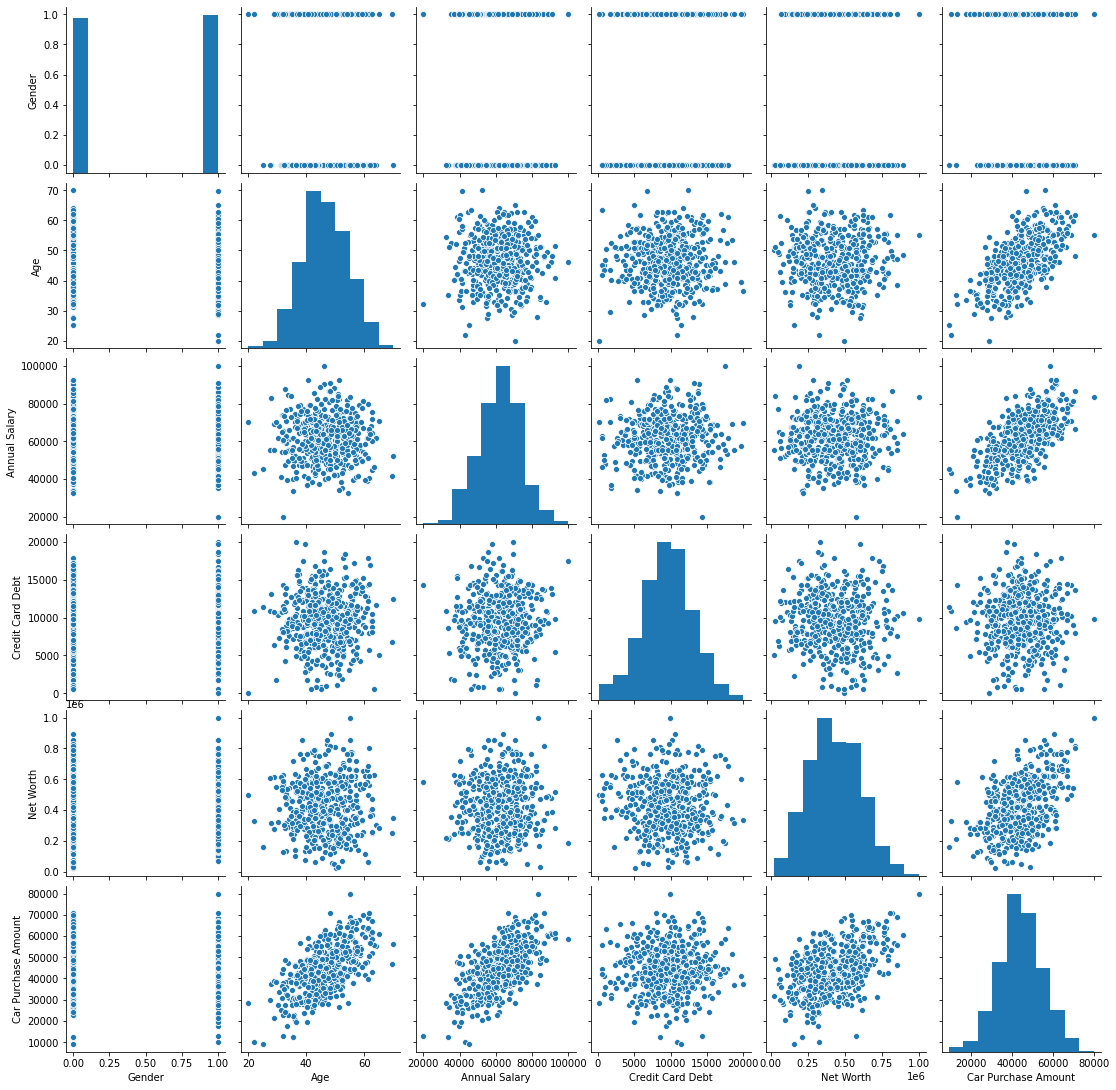

In [6]:
sns.pairplot(car_df)

In [7]:
car_df

Customer Name  ... Car Purchase Amount
0      Martina Avila  ...         35321.45877
1      Harlan Barnes  ...         45115.52566
2    Naomi Rodriquez  ...         42925.70921
3    Jade Cunningham  ...         67422.36313
4       Cedric Leach  ...         55915.46248
..               ...  ...                 ...
495           Walter  ...         48901.44342
496            Vanna  ...         31491.41457
497            Pearl  ...         64147.28888
498             Nell  ...         45442.15353
499            Marla  ...         45107.22566

[500 rows x 9 columns]

In [11]:
x=car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [12]:
x

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

In [14]:
y=car_df['Car Purchase Amount']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
y_scaled=scaler.fit_transform(y)

In [22]:
y = y.values.reshape(-1,1)

In [16]:
x_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [17]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [18]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y_scaled)

In [52]:
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(25,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_10 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [54]:
epochs_hist=model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3014 - val_loss: 0.2188
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1702 - val_loss: 0.1153
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0857 - val_loss: 0.0532
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.0229
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0138
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0134
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0104
Epoch 11/100
6/6 [==========

In [56]:
X_test =np.array([[1,50,50000,1000,600000]])
y_predict=model.predict(X_test)

In [57]:
y_predict

array([[346222.75]], dtype=float32)

In [50]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

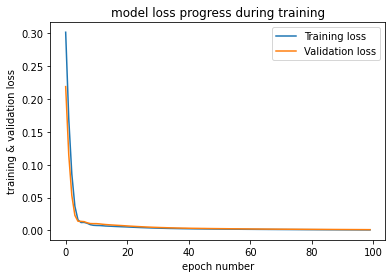

In [55]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model loss progress during training')
plt.ylabel('training & validation loss')
plt.xlabel('epoch number')
plt.legend(['Training loss','Validation loss'])